In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/TensorFlow 2.0/modules')
import pandas as pd
import tf_dataset_extractor as e
#import grapher_v1_1 as g
#import LSTM_creator_v1_0 as l
v = e.v
g = e.g
l = e.l

##Using Tools

In [0]:
import pandas as pd
#importing dataset
e.X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200528_Wine_Classifier/wine_data.csv')
e.K = v.upload.make_backup()
e.X

,Wine,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


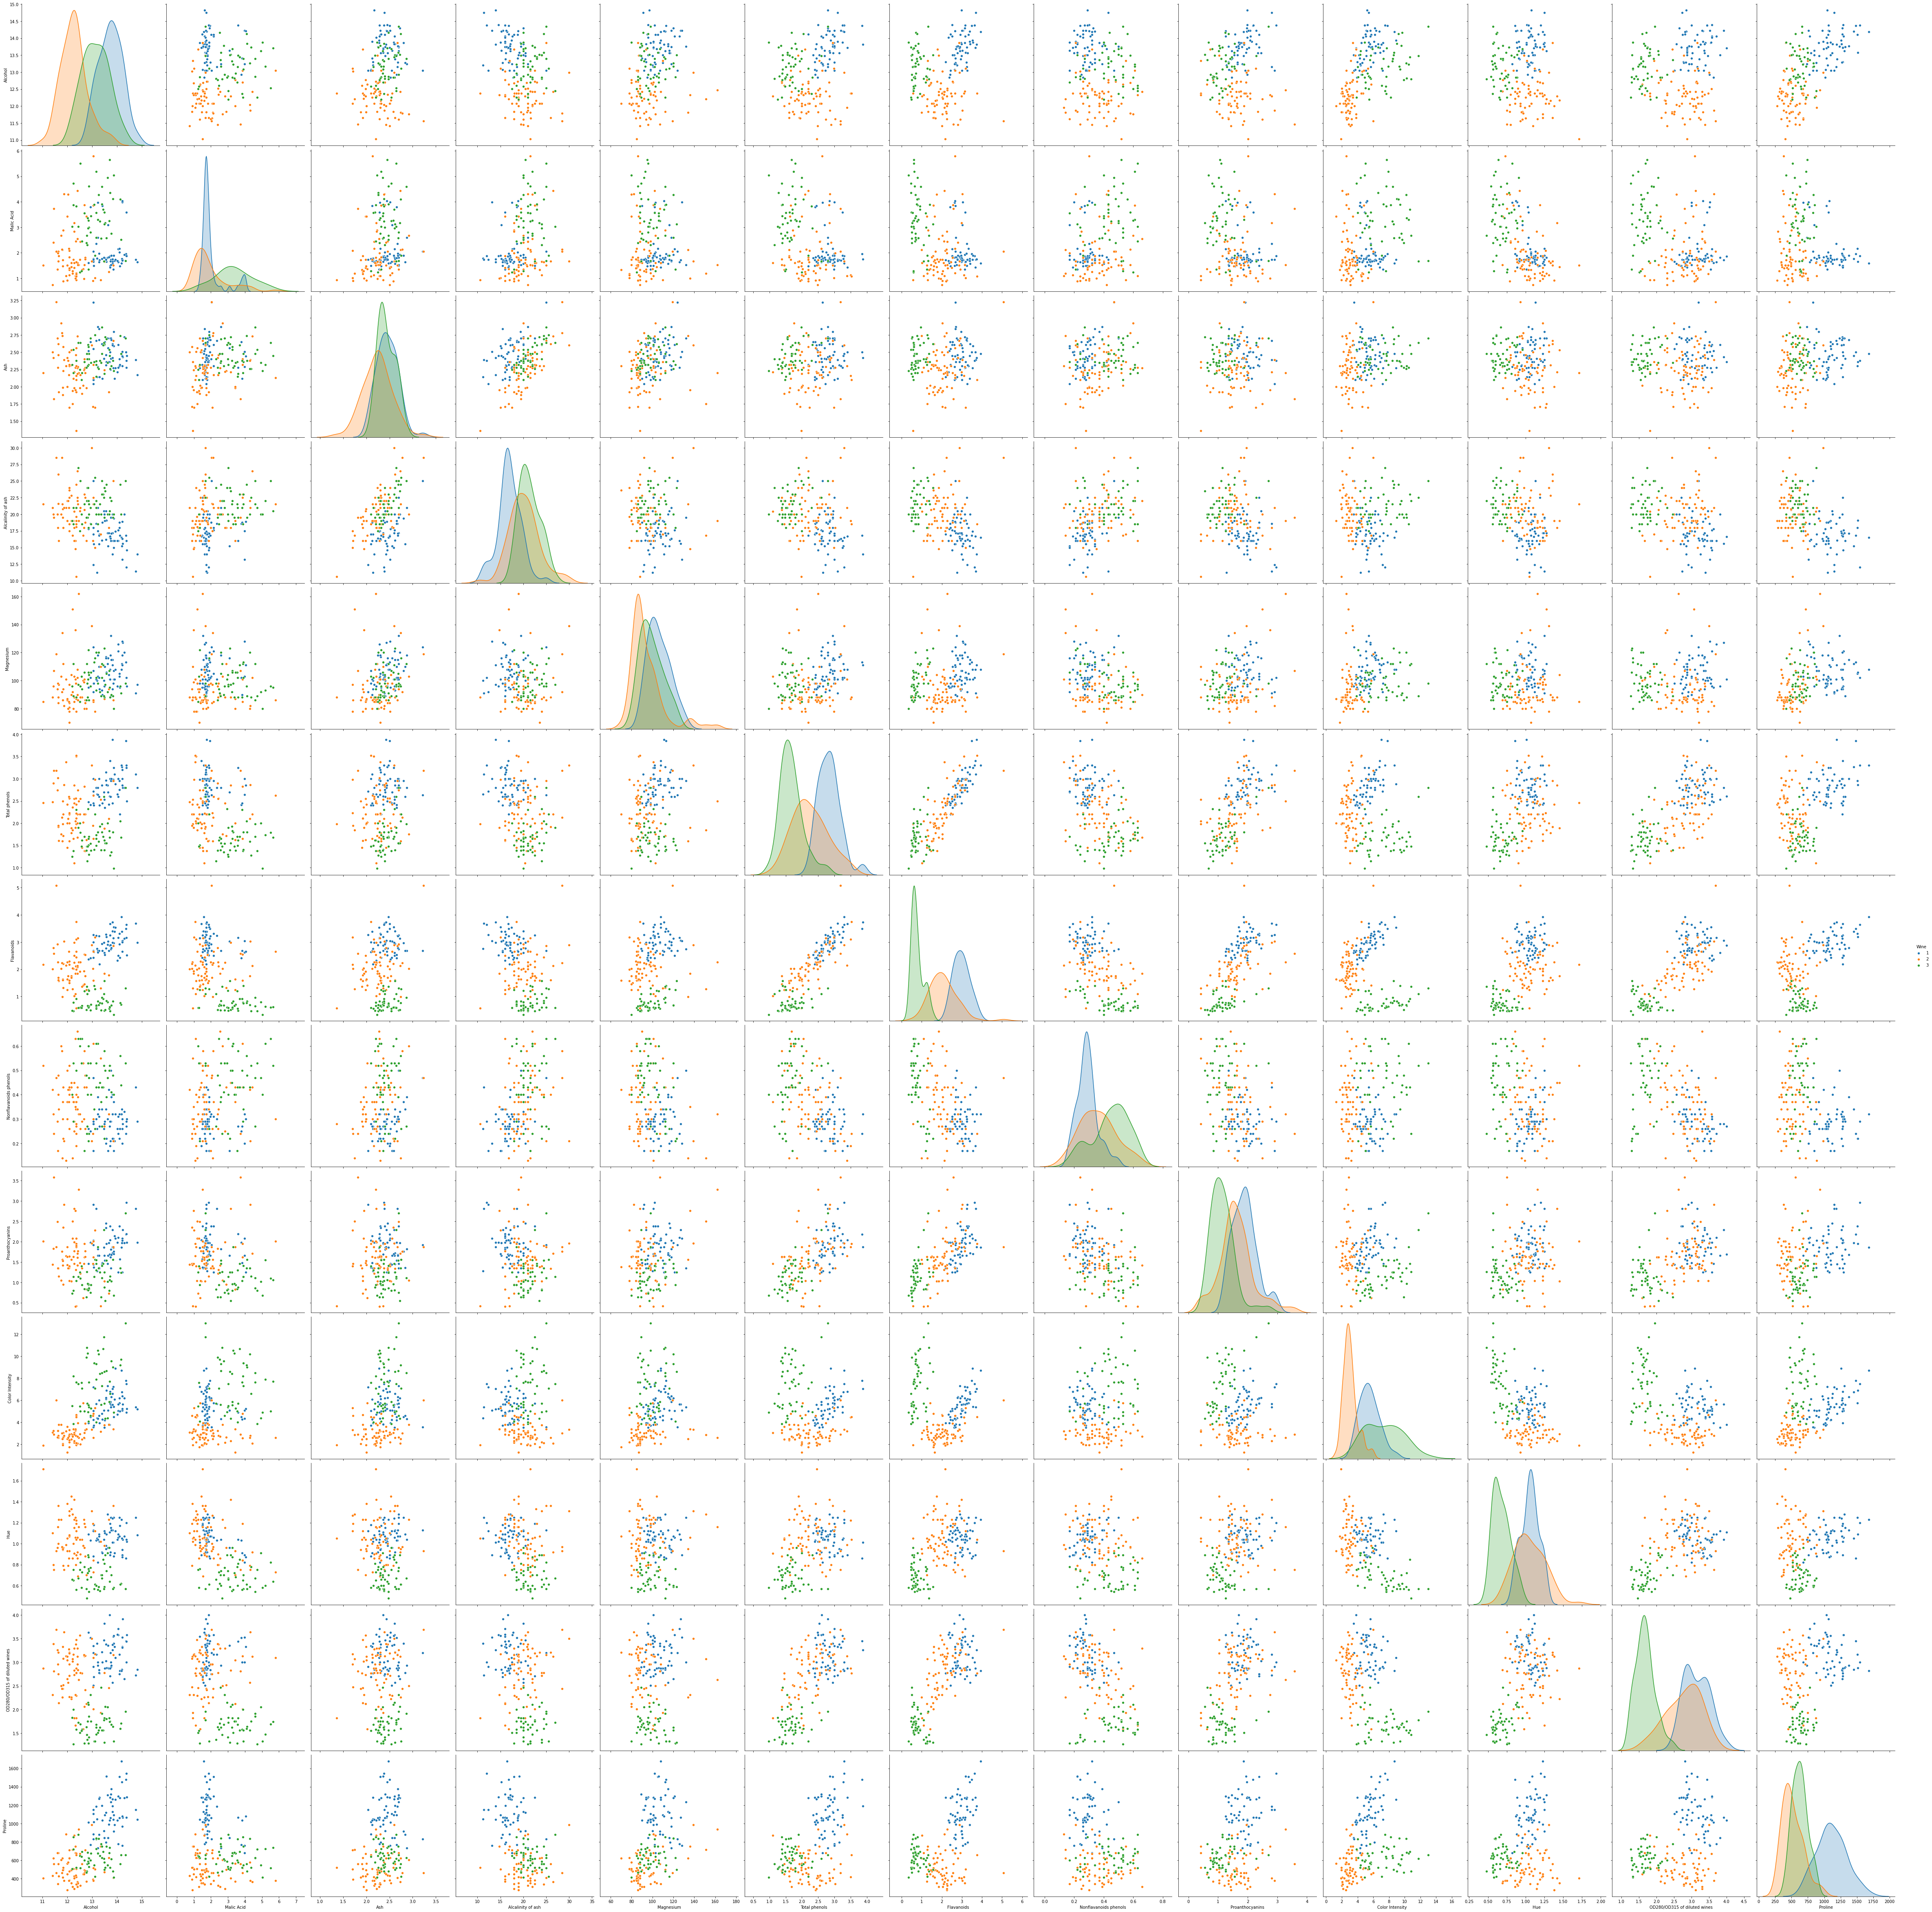

In [0]:
#correlogram
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(X, hue='Wine', height=5)
plt.show()

In [0]:
v.upload.retrieve_backup(e.K)
v.extract.labels(['Wine'])
e.y

,Wine
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [0]:
X_train, X_test, y_train, y_test = v.split(0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 17) (36, 17) (142, 1) (36, 1)


In [0]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
v.statistics.cross_validation(clf, X_train, y_train, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

('Accuracy: 1.00 (+/- 0.00)', array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

##Not using functions

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200528_Wine_Classifier/wine_data.csv')
X

,Wine,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
y = pd.DataFrame(X.pop('Wine'))
y

,Wine
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [0]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y, cv=10)
acc = ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(acc, scores)